In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import datetime

## save the excel data to numpy data
### just need to run for the first time

In [104]:
dirpath = '/home/zyj0704033/Voltage_Control/data/2015AGC'
if os.path.exists(dirpath):
    dirlist = os.listdir(dirpath)
for s in dirlist:
    if s[-4:]=='xlsx' and s[0]!='0':
        xlsxname = '/home/zyj0704033/Voltage_Control/data/2015AGC/'+s
        df = pd.read_excel(xlsxname,header=None)
        print('read '+s+' finish!')
        dfnp = np.array([df[3],df[6]])
        dfname = '/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/'+s[:-4]+'npy'
        np.save(dfname,dfnp)

read 4单晶河(一期)风场.xlsx finish!
read 32中宝风场.xlsx finish!
read 49杉源风场.xlsx finish!
read 35博丰风场.xlsx finish!
read 11五花坪(一期)风场.xlsx finish!
read 42恒泰风场.xlsx finish!
read 48德润风场.xlsx finish!
read 46永发风场.xlsx finish!
read 56三峡双爱.xlsx finish!
read 10卧龙山(二期)风场.xlsx finish!
read 36桦树岭风场.xlsx finish!
read 22阳城子.xlsx finish!
read 16红花梁风场.xlsx finish!
read 20天鹅湖风场.xlsx finish!
read 19黑沿子风场.xlsx finish!
read 14国华(一二期)风场.xlsx finish!
read 38三峡石井风场.xlsx finish!
read 5单晶河(二三期)风场.xlsx finish!
read 45佳鑫风场.xlsx finish!
read 54韩家庄风场.xlsx finish!
read 1乌登山(张北)风场.xlsx finish!
read 51曹碾沟风场.xlsx finish!
read 7祥风(围场)风场.xlsx finish!
read 53汇枫风场.xlsx finish!
read 30友谊风场.xlsx finish!
read 44秋林风场.xlsx finish!
read 43莲花滩风场.xlsx finish!
read 39牧场风场.xlsx finish!
read 21丁家营.xlsx finish!
read 18乐亭风场.xlsx finish!
read 40麒麟山风场.xlsx finish!
read 37长青风场.xlsx finish!
read 58东湾风场.xlsx finish!
read 52天桥山风场.xlsx finish!
read 24洛金洼.xlsx finish!
read 25宏达风场.xlsx finish!
read 9清三营(二期)风场.xlsx finish!
read 41德和风场.xlsx finish!
read 12

## read the numpy data

In [110]:
df_names =  pd.read_excel('/home/zyj0704033/Voltage_Control/data/2015AGC/0场站名称.xlsx',header=None)
filedir = '/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/'
l = []
for i in range(len(df_names[1])):
    filename = filedir+str(df_names[0][i])+df_names[1][i]+'.npy'
    df = np.load(filename)
    l.append(df)

## time alignment

In [2]:
df_names =  pd.read_excel('/home/zyj0704033/Voltage_Control/data/2015AGC/0场站名称.xlsx',header=None)
filedir = '/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/'
uselesslist = [18,21,22,27,34,43,44,53,56,57,58]
b = np.arange('2015-07','2016-01',dtype='datetime64[m]')
c = np.array([b,np.arange(264960)])
pdc = pd.DataFrame(c.T,columns=['time','0'])
j = 0
for i in range(len(df_names[1])):
    j += 1
    if j not in uselesslist:
        print(j)
        filename = filedir+str(df_names[0][i])+df_names[1][i]+'.npy'
        df = np.load(filename)
        pdtmp = pd.DataFrame(df.T,columns=['time',str(j)])
        pdc = pd.merge(pdc,pdtmp,how='left')
totalnp = np.array(pdc)
np.save('/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/totalnp.npy',totalnp)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
19
20
23
24
25
26
28
29
30
31
32
33
35
36
37
38
39
40
41
42
45
46
47
48
49
50
51
52
54
55


In [15]:
npwithoutnan = np.array(pdc.dropna())
np.save('/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/npwithoutnan2.npy',npwithoutnan[:,1:])


In [10]:
totalnp.shape

(264960, 48)

## plot figures

/home/zyj0704033/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


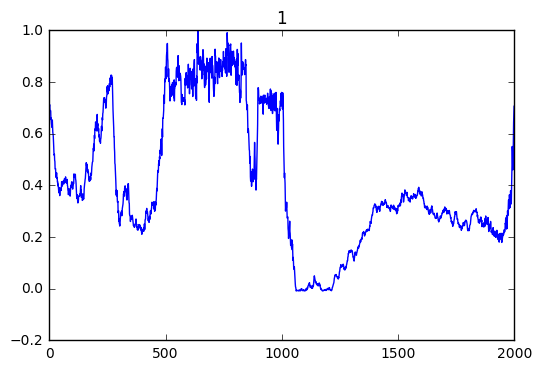

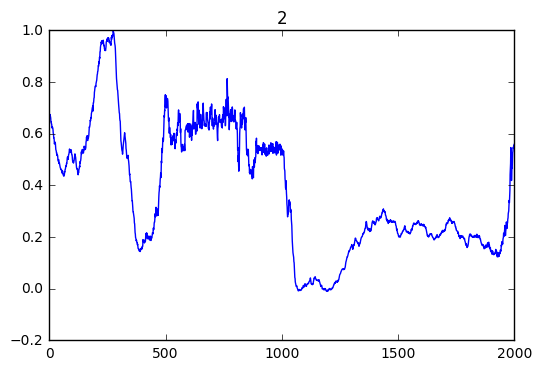

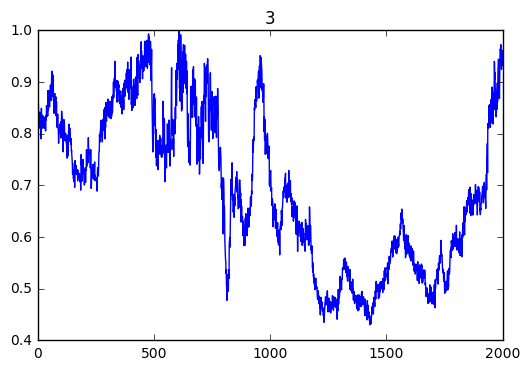

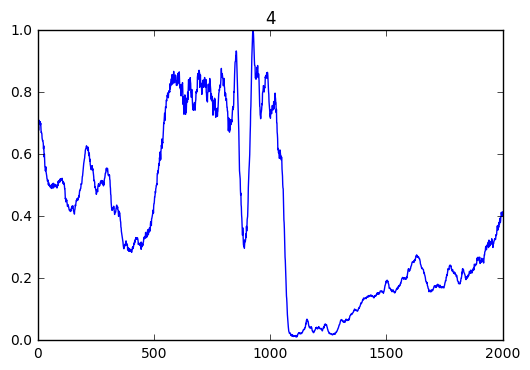

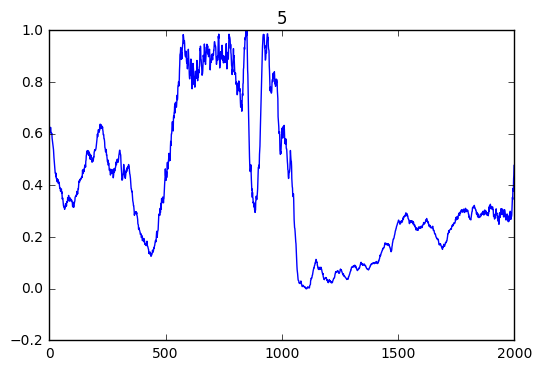

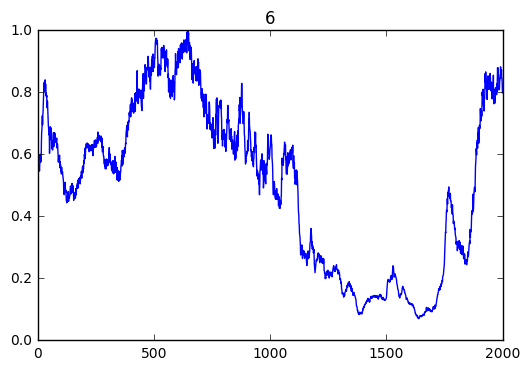

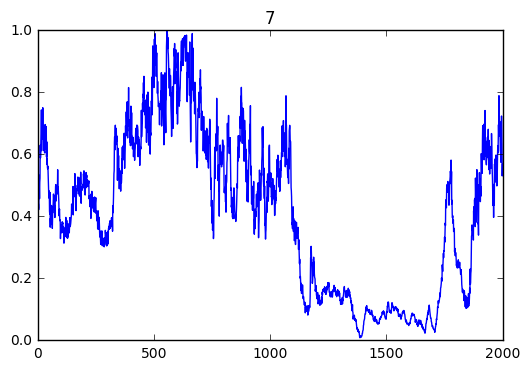

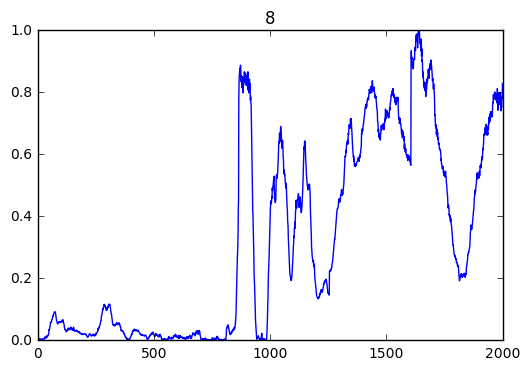

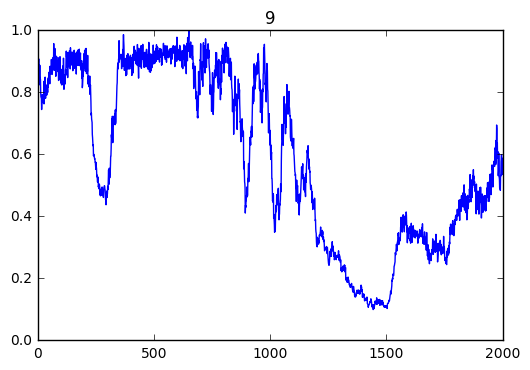

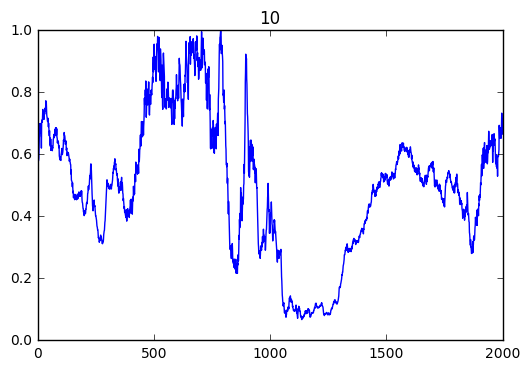

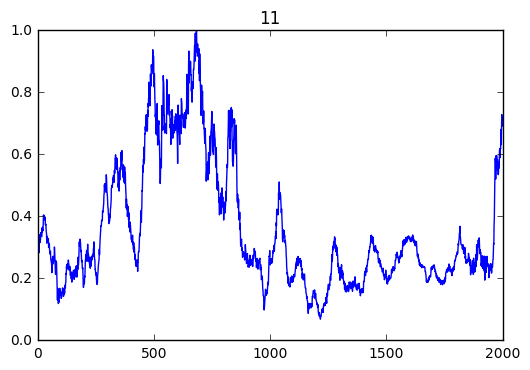

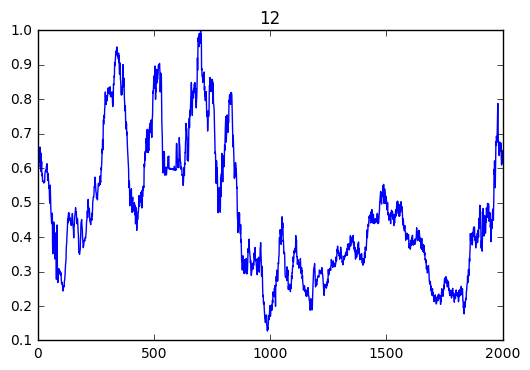

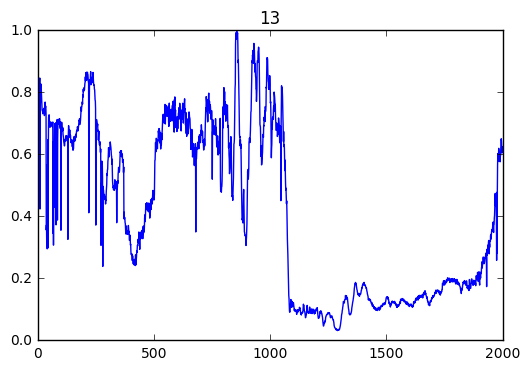

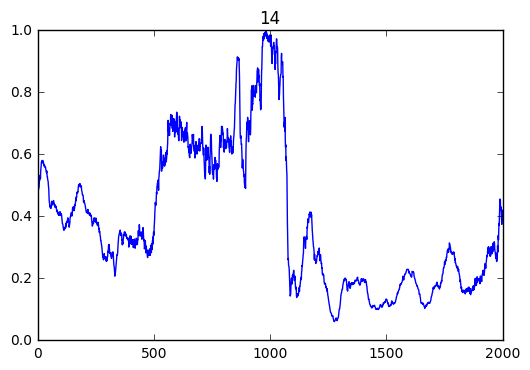

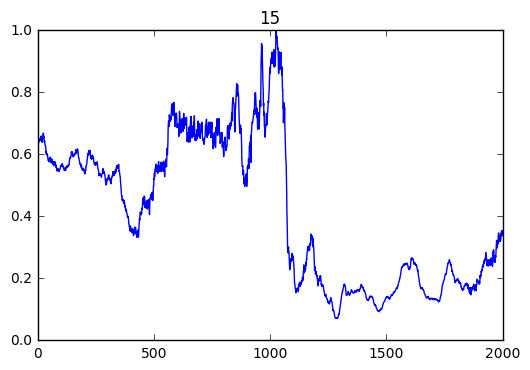

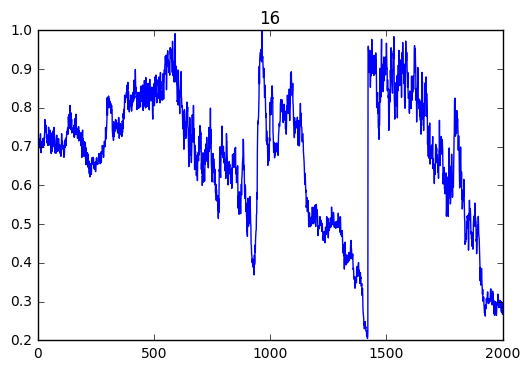

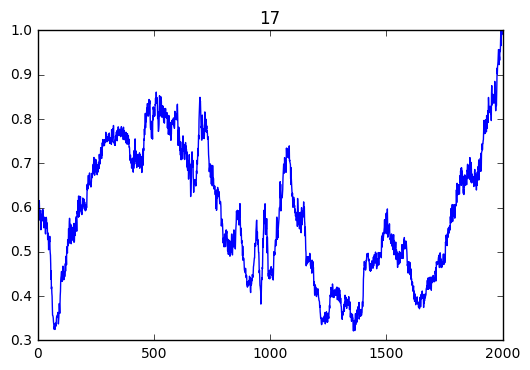

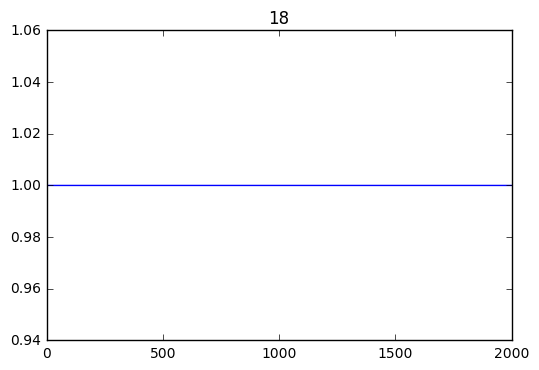

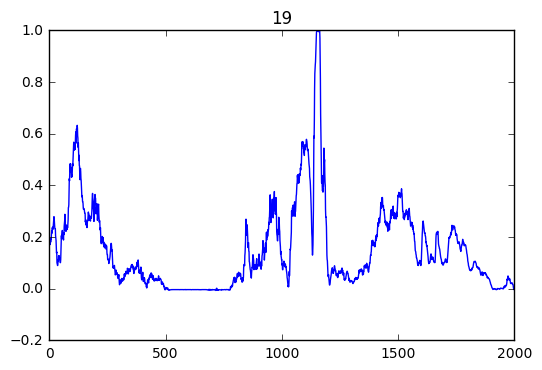

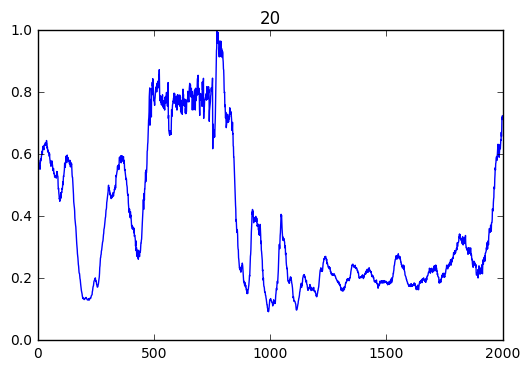

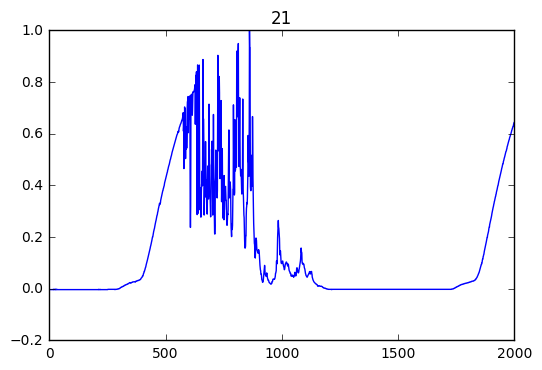

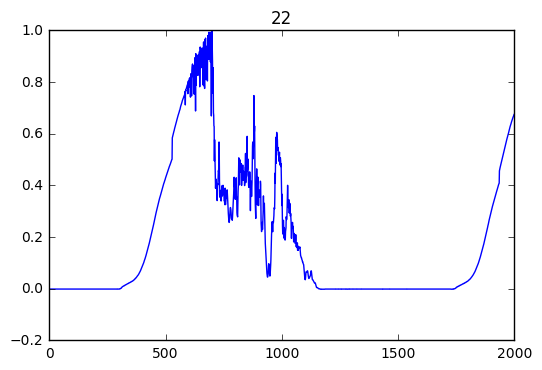

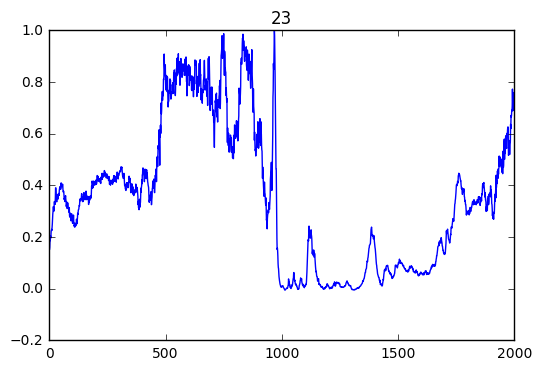

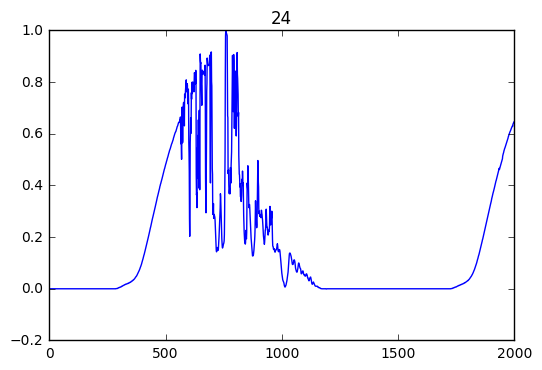

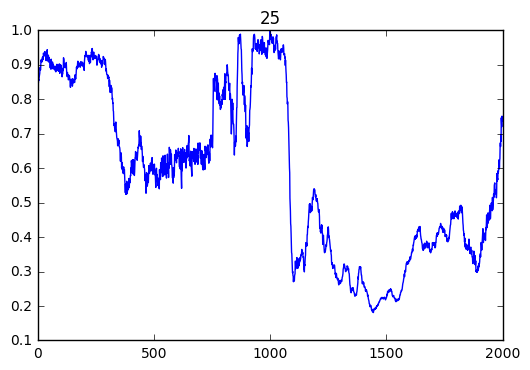

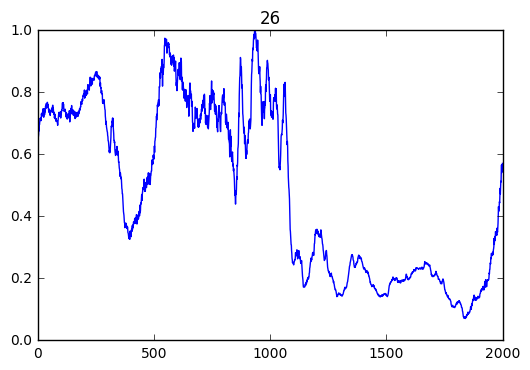

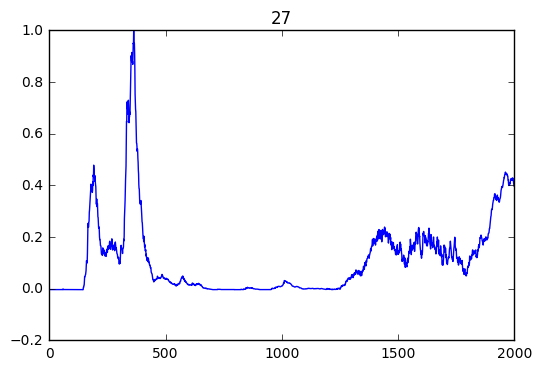

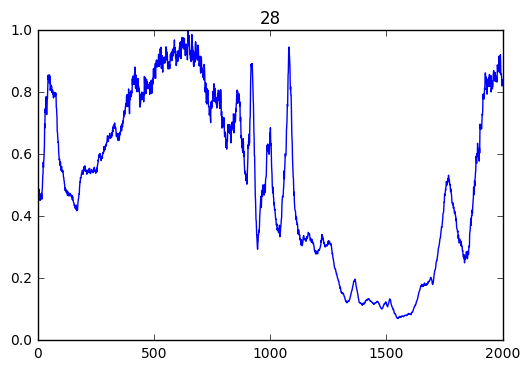

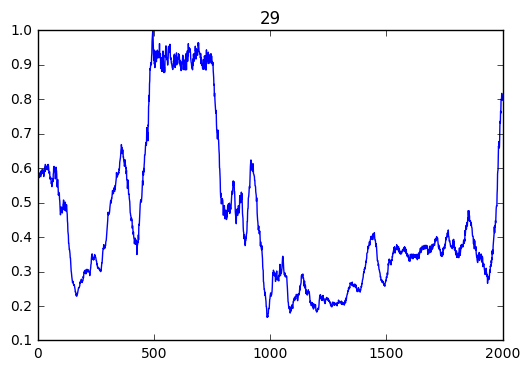

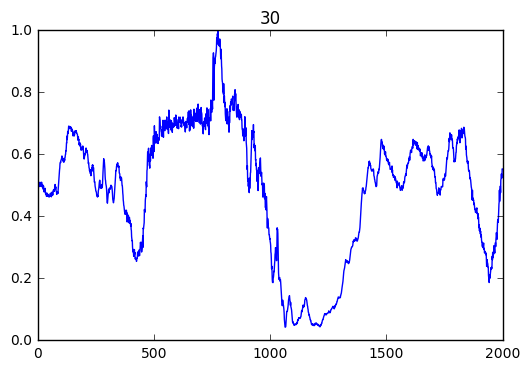

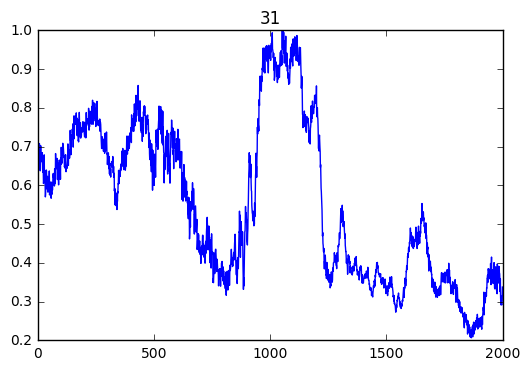

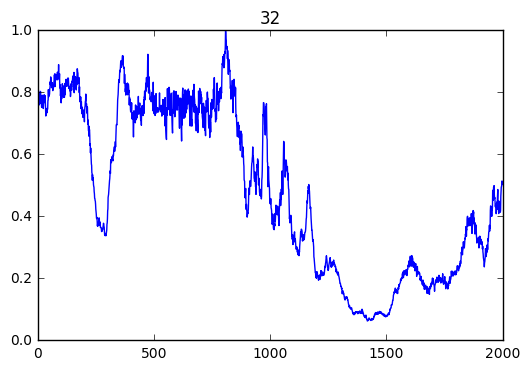

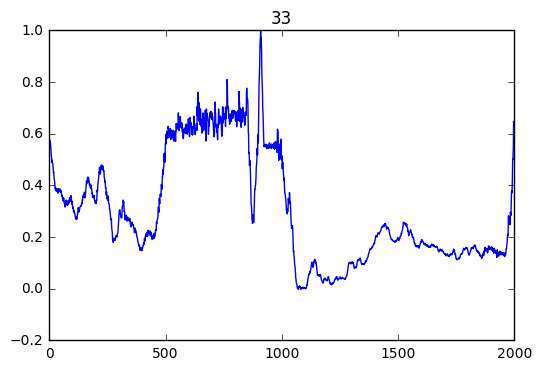

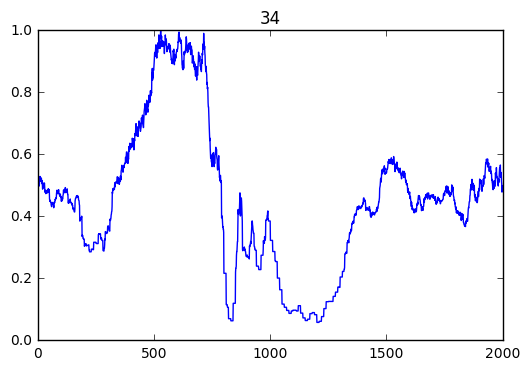

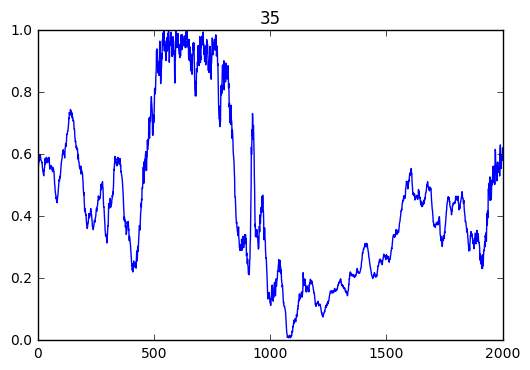

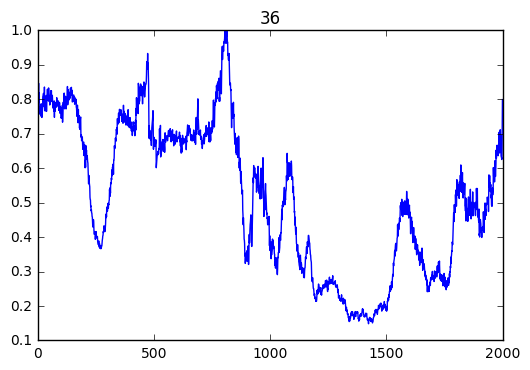

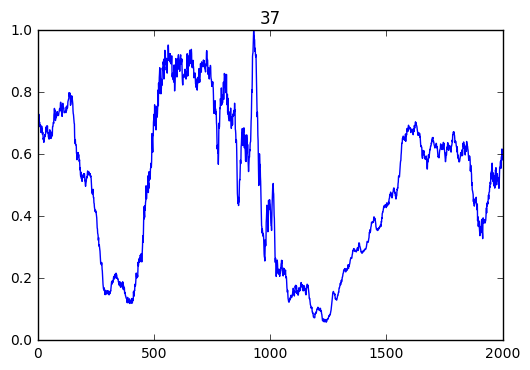

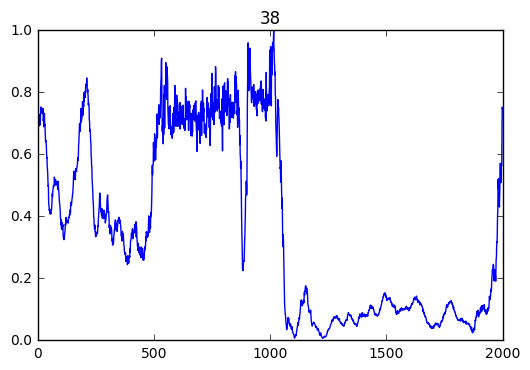

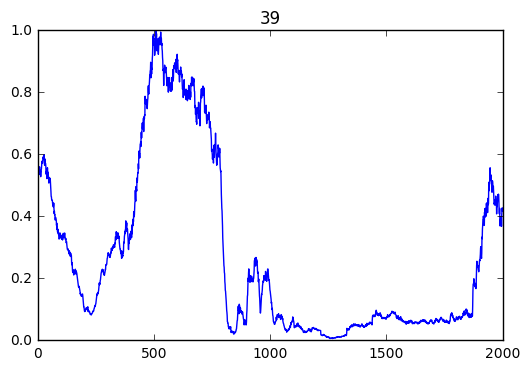

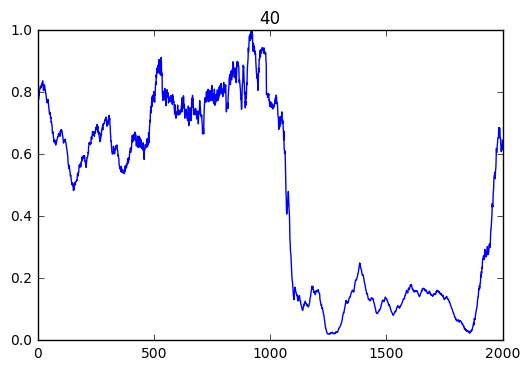

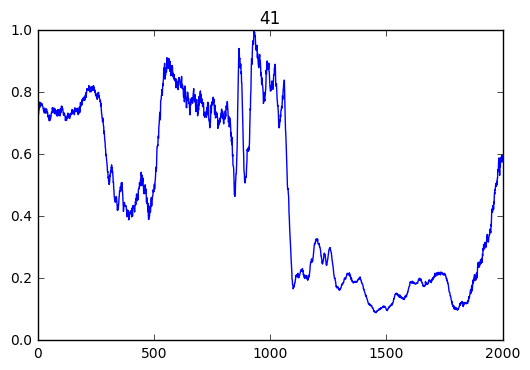

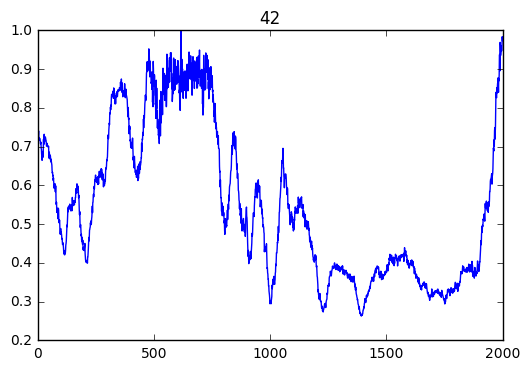

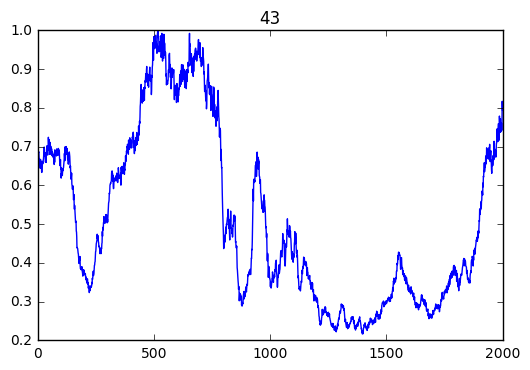

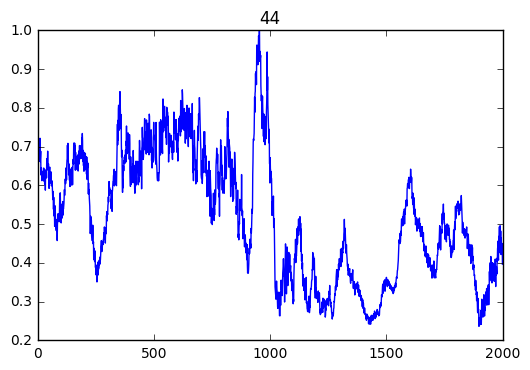

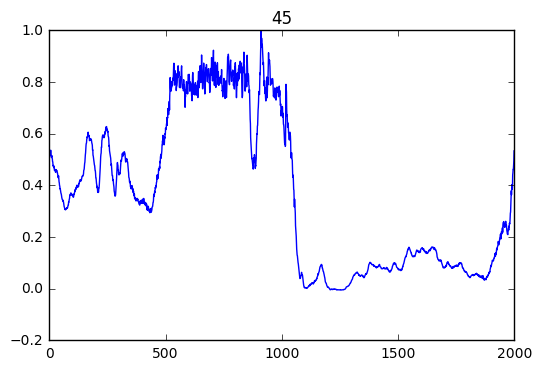

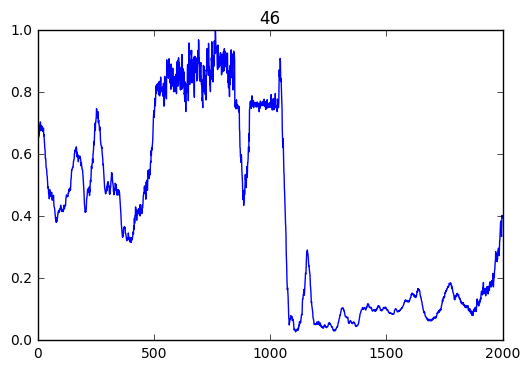

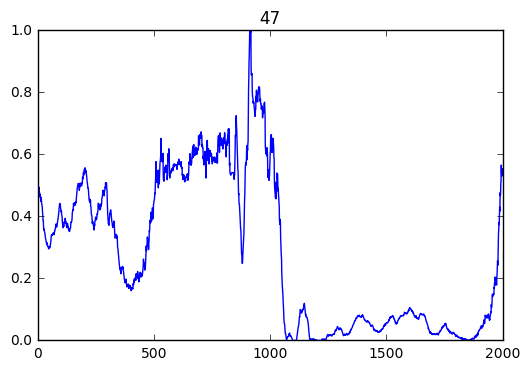

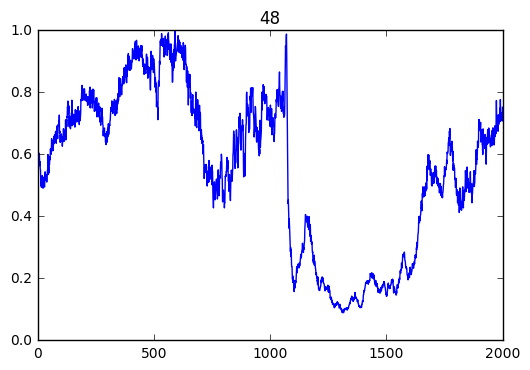

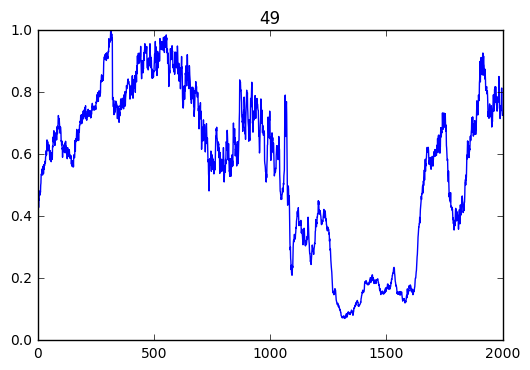

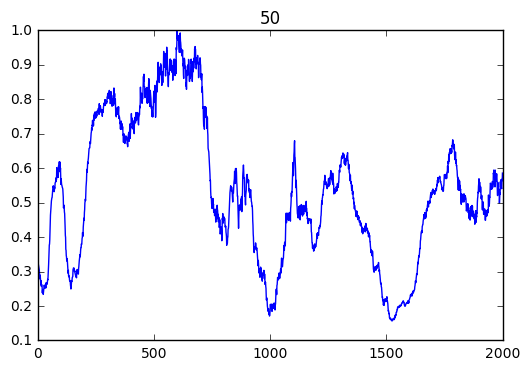

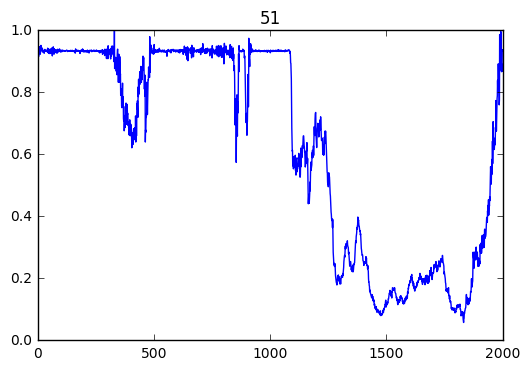

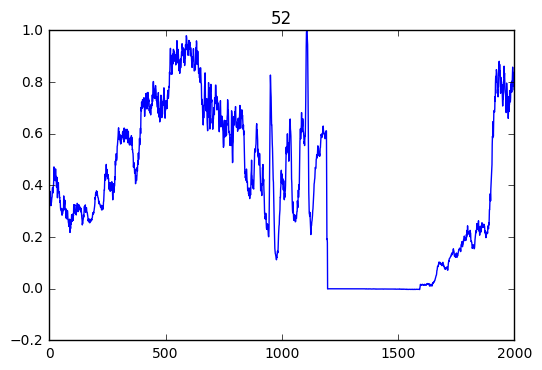

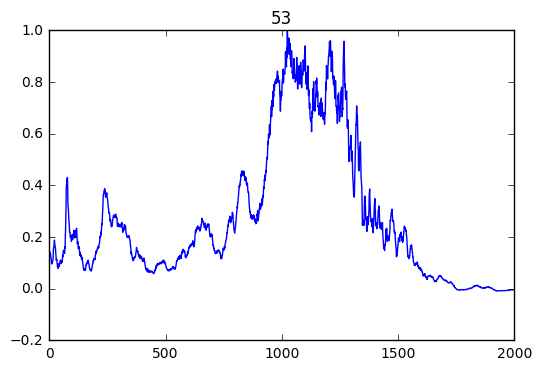

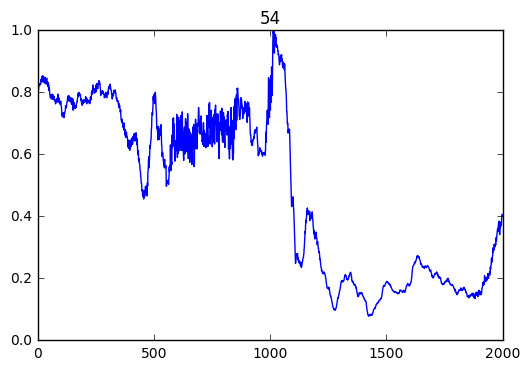

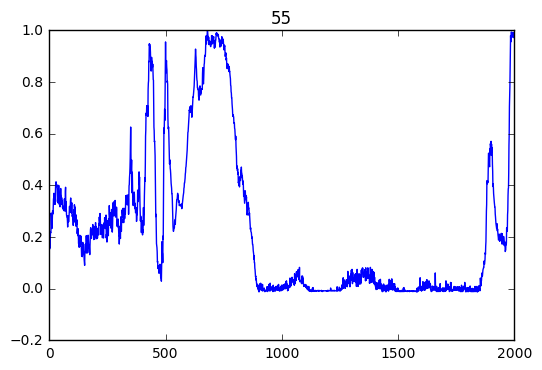

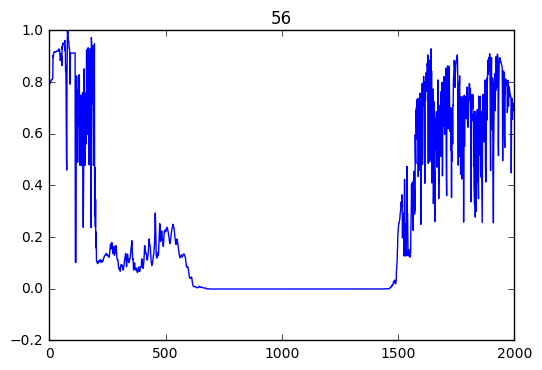

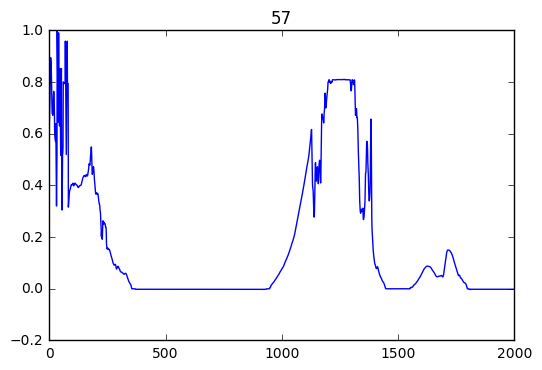

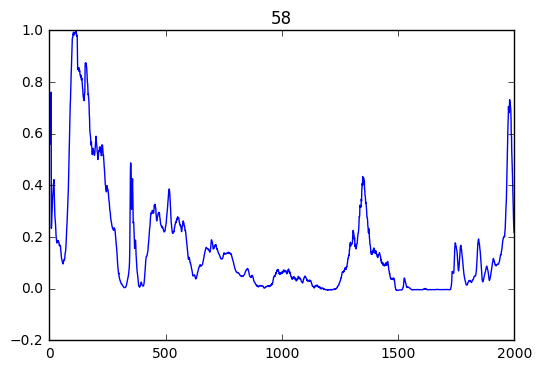

In [127]:
numtoplot = 2000 
j = 0

for i in l:  
    j += 1
    plt.figure(str(i))
    plt.plot(range(len(i[0,:numtoplot])),i[1,:numtoplot]/i[1,:numtoplot].max())
    plt.title(str(j))
plt.show()
    

In [183]:
a = np.load('/home/zyj0704033/Voltage_Control/data/2015AGC/numpy_data/4单晶河(一期)风场.npy')
b = np.arange('2015-07','2016-01',dtype='datetime64[m]')
c = np.array([b,np.arange(264960)])
pda = pd.DataFrame(a.T,columns=['time','4'])
pdb = pd.DataFrame(c.T,columns=['time','0'])

In [176]:
np.array([b,np.arange(264960)]).shape

(2, 264960)

In [188]:
pdb = pd.merge(pdb,pda,how='left')

In [189]:
pdb

,time,0,4
0,2015-07-01 00:00:00,0,105.48
1,2015-07-01 00:01:00,1,107.64
2,2015-07-01 00:02:00,2,110.21
3,2015-07-01 00:03:00,3,112.59
4,2015-07-01 00:04:00,4,110.95
5,2015-07-01 00:05:00,5,112.75
6,2015-07-01 00:06:00,6,116.3
7,2015-07-01 00:07:00,7,115.18
8,2015-07-01 00:08:00,8,115.41
9,2015-07-01 00:09:00,9,115.23
